<a href="https://colab.research.google.com/github/rooberttojr/IGTI_Atividades_machine_Learning/blob/master/Desafio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import r2_score
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [6]:
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [0]:
nome_arquivo = "comp_bikes_mod.csv"
banco_dados_bikes = pd.read_csv(nome_arquivo)

In [8]:
banco_dados_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [9]:
banco_dados_bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [11]:
banco_dados_bikes.shape

(17379, 17)

In [12]:
#descrição de csv
banco_dados_bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
#verificando as colunas com dados missing no dataset
def check_missing(df, display = 10):
  temp_df = df.copy()
  df_nan = (temp_df.isnull().sum() / len(temp_df))*100
  missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(), '% Missing' :df_nan})
  if missing_data['Missing n'].sum == 0:
    return print ('Não temos valores nulos')
  else:
    return missing_data.sort_values('% Missing', ascending = False).head(display)

check_missing(banco_dados_bikes, display = 17)

,Missing n,% Missing
instant,1738,10.000575
weathersit,1738,10.000575
registered,1738,10.000575
casual,1738,10.000575
windspeed,1738,10.000575
hum,1738,10.000575
atemp,1738,10.000575
temp,1738,10.000575
workingday,1738,10.000575
dteday,1738,10.000575


In [20]:
#deletando dados da coluna dteday
banco_dados_bikes = banco_dados_bikes.dropna(subset=['dteday'])
banco_dados_bikes.shape

(15641, 17)

In [36]:
#fazendo previsões com o modelo Decision tree Regressor

#criando um novo dataset somente com as coluna para a questao
new_banco_dados_bike = banco_dados_bikes[['hum', 'casual', 'cnt']]

#removendo valores missing
new_banco_dados_bike.fillna(new_banco_dados_bike.mean(), inplace=True)

#Verificando o tamanho do dataset
new_banco_dados_bike.shape

# Separando as features indepdndentes  e dependente (target)
x = new_banco_dados_bike[['hum','casual']]
y = new_banco_dados_bike['cnt']

# Criando o modelo de arvore
dt_model = DecisionTreeRegressor()

#fit do modelo
dt_model.fit(x,y)

#Previsões
y_pred = dt_model.predict(x)

#Avaliando as previsões
accuracy = r2_score(y, y_pred)
print("\n Score R2: %0.2f" % accuracy)

(15641, 3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


 Score R2: 0.71


In [37]:
#fazendo previsões com o modelo Linear Regression

#criando um novo dataset somente com as coluna para a questao
new_banco_dados_bike = banco_dados_bikes[['hum', 'casual', 'cnt']]

#removendo valores missing
new_banco_dados_bike.fillna(new_banco_dados_bike.mean(), inplace=True)

#Verificando o tamanho do dataset
new_banco_dados_bike.shape

# Separando as features indepdndentes  e dependente (target)
x = new_banco_dados_bike[['hum','casual']]
y = new_banco_dados_bike['cnt']

# Criando o modelo de arvore
dt_model = LinearRegression()

#fit do modelo
dt_model.fit(x,y)

#Previsões
y_pred = dt_model.predict(x)

#Avaliando as previsões
accuracy = r2_score(y, y_pred)
print("\n Score R2: %0.2f" %accuracy)

(15641, 3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


 Score R2: 0.41


In [40]:
#fazendo previsões com o modelo SVR

#criando um novo dataset somente com as coluna para a questao
new_banco_dados_bike = banco_dados_bikes[['hum', 'casual', 'cnt']]

#removendo valores missing
new_banco_dados_bike.fillna(new_banco_dados_bike.mean(), inplace=True)

#Verificando o tamanho do dataset
new_banco_dados_bike.shape

# Separando as features indepdndentes  e dependente (target)
x = new_banco_dados_bike[['hum','casual']]
y = new_banco_dados_bike['cnt']

# Criando o modelo de arvore
dt_model = SVR()

#fit do modelo
dt_model.fit(x,y)

#Previsões
y_pred = dt_model.predict(x)

#Avaliando as previsões
accuracy = r2_score(y, y_pred)
print("\n Score R2: %0.2f" %accuracy)

(15641, 3)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


 Score R2: 0.40


In [41]:
#verificando dados estatisticos variavel 'temp'
banco_dados_bikes['temp'].describe()

count    14066.000000
mean         0.496926
std          0.192971
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

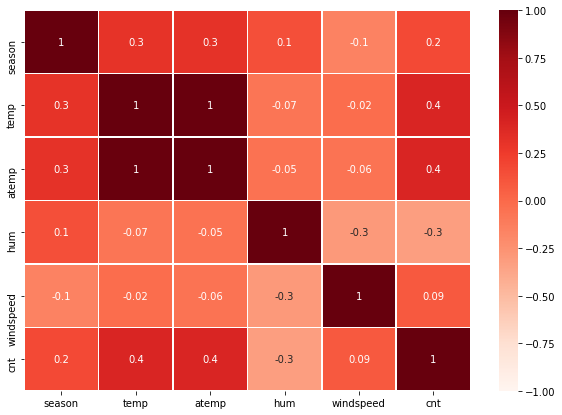

In [57]:
#configurando tamanho do grafico
plt.figure(figsize=(10,7))

#selecionando colunas para verificar a correlação
corr = banco_dados_bikes[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

#Configurrando mapa de cores
sns.heatmap(corr, linewidths=.5, vmin=-1, vmax=1, annot=True, cmap="Reds", fmt='.1g')

# Imprimir o grafico
plt.show();


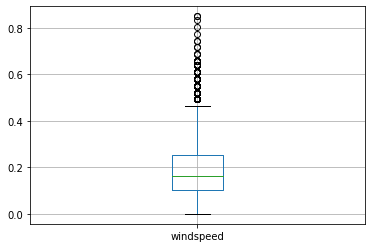

In [58]:

# identificando possíveis outliers
banco_dados_bikes[['windspeed']].boxplot();

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

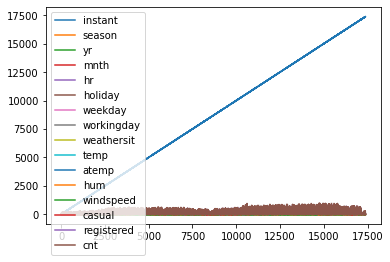

In [62]:

#configurando tamanho do grafico
plt.figure(figsize=(10,7))
#mostrando grafico geral
banco_dados_bikes.plot()

In [63]:
# Verificando dados estatisticos somente da variavel 'windspeed'
banco_dados_bikes['windspeed'].describe()

count    14082.000000
mean         0.189552
std          0.122309
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64